# Ship Fuel Consumption & CO2 Emission Analysis Project
<img src="A_vibrant_and_colorful_depiction_of_a_modern_cargo.JPG" alt="Ship Emitting Exhaust Gases"/>

## Project Introduction: 

#### Analyzing Fuel Consumption and CO2 Emissions of Ships in Nigeria
##### Background:
The maritime industry is a vital part of Nigeria's economy, facilitating the transport of goods and people across the country's waterways. With the increasing focus on environmental sustainability and the reduction of carbon emissions, there is a need for a comprehensive analysis of fuel consumption and CO2 emissions from different types of ships operating in Nigerian waters.

##### Objective:
This project aims to perform an in-depth analysis of fuel consumption and CO2 emissions across various ship types in Nigeria, specifically focusing on Fishing Trawlers, Oil Service Boats, Surfer Boats (offshore passenger transfer vessels), and Tanker Ships. By doing so, we can identify trends, correlations, and significant differences that could inform decision-making and potential strategies for fuel management and emission reduction.

##### Scope and Approach:

- Data Generation:We will be ussing simulated data that represents realistic fuel consumption and CO2 emission scenarios for each ship type.
- Exploratory Data Analysis (EDA): Visualizations and summary statistics will be generated to understand the distribution of fuel consumption and emissions and identify any initial patterns.
- Trend Analysis: Analyze the monthly variations in fuel consumption and CO2 emissions to understand seasonal trends.
- Correlation Analysis: Assess relationships between fuel consumption, CO2 emissions, and other factors like engine efficiency.
- Statistical Testing: Use ANOVA and Tukey HSD to identify significant differences in fuel consumption across different ship types and validate the finding.
-  Predictive Analysi **( Future Work )**):   Evaluate if predictive modeling could add value to forecasting fuel consumption and CO2 emissions.
##### Dataset Schema

| Column               | Description                                         | Example                  |
|----------------------|-----------------------------------------------------|--------------------------|
| `ship_id`            | Unique identifier for ships                         | NG001                    |
| `ship_type`          | Type of vessel                                      | Tanker Ship              |
| `route_id`           | Identifier for routes                               | Port Harcourt-Lagos      |
| `month`              | Month of operation                                  | January                  |
| `distance`           | Distance covered in nautical miles                  | 250                      |
| `fuel_type`          | Type of fuel used                                   | Diesel                   |
| `fuel_consumption`   | Fuel consumed in liters                             | 12,000                   |
| `CO2_emissions`      | Carbon emissions in kilograms                       | 32,000                   |
| `weather_conditions` | Weather during the trip (Calm, Moderate, Stormy)    | Moderate                 |
| `engine_efficiency`  | Efficiency Ef the ship’s tngine (percen age)        | 85            |
centage)	85

##### Expected Outcomes:
- Identification of ship types with the highest fuel consumption and CO2 emissions.
- Insights into the trends of fuel consumption and emissions over months.
- Understanding of how engine efficiency correlates with fuel consumption and emissions.
- Statistical confirmation of significant differences in fuel consumption across ship types.

## Dataset Preparation

In [97]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


# Initialize constants for dataset generation
n_ships = 120  # Number of unique ships
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
ship_types = ["Surfer Boat", "Oil Service Boat", "Fishing Trawler", "Tanker Ship"]
routes = ["Lagos-Apapa", "Warri-Bonny", "Escravos-Lagos", "Port Harcourt-Lagos"]
weather_conditions = ["Calm", "Moderate", "Stormy"]
fuel_types = ["Diesel", "HFO"]

# Initialize dataset
data = []

# Data generation logic
for i in range(1, n_ships + 1):  # 120 ships
    ship_id = f"NG{str(i).zfill(3)}"
    ship_type = random.choice(ship_types)
    
    for month in months:  # 12 months per ship
        route = random.choice(routes)
        
        # Set parameters based on ship type
        if ship_type == "Surfer Boat":
            distance = round(random.uniform(20, 200), 2)  # Surfer boats operate short to mid-range
            fuel_type = "Diesel"  # Surfer boats use only Diesel
            fuel_efficiency_range = (10, 20)
        elif ship_type == "Fishing Trawler":
            distance = round(random.uniform(50, 200), 2)
            fuel_type = random.choice(fuel_types)
            fuel_efficiency_range = (20, 30)
        elif ship_type == "Oil Service Boat":
            distance = round(random.uniform(20, 150), 2)
            fuel_type = random.choice(fuel_types)
            fuel_efficiency_range = (25, 35)
        elif ship_type == "Tanker Ship":
            distance = round(random.uniform(50, 500), 2)
            fuel_type = random.choice(fuel_types)
            fuel_efficiency_range = (30, 50)
        
        fuel_efficiency = random.uniform(*fuel_efficiency_range)
        fuel_consumption = round(distance * fuel_efficiency, 2)
        co2_emissions = round(fuel_consumption * random.uniform(2.5, 3.0), 2)  # Emission factor
        weather = random.choice(weather_conditions)
        engine_efficiency = round(random.uniform(70, 95), 2)
        
        # Append to dataset
        data.append([
            ship_id, ship_type, route, month, distance, fuel_type,
            fuel_consumption, co2_emissions, weather, engine_efficiency
        ])

# Create the DataFrame
columns = [
    "ship_id", "ship_type", "route_id", "month", "distance", "fuel_type",
    "fuel_consumption", "CO2_emissions", "weather_conditions", "engine_efficiency"
]
marine_dataset = pd.DataFrame(data, columns=columns)



# Save to CSV

# marine_dataset.to_csv("ship_fuel_efficiency.csv", index=False)

# Let inspect the few rows of the dataset 
marine_dataset.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Fishing Trawler,Escravos-Lagos,January,147.63,Diesel,3491.69,9210.53,Stormy,81.62
1,NG001,Fishing Trawler,Escravos-Lagos,February,132.76,HFO,3978.40,10222.56,Moderate,79.16
2,NG001,Fishing Trawler,Escravos-Lagos,March,188.29,HFO,3809.96,10438.29,Moderate,78.57
3,NG001,Fishing Trawler,Escravos-Lagos,April,78.55,Diesel,2057.60,5602.42,Moderate,76.18
4,NG001,Fishing Trawler,Lagos-Apapa,May,116.09,Diesel,2864.26,8294.63,Moderate,75.76


In [12]:
# Making a copy of the dataset 
df = marine_dataset.copy()

### Basic Checks & Data Cleaning

In [14]:
marine_dataset.shape

(1440, 10)

In [15]:
marine_dataset.describe()

,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,156.333604,4955.559722,13593.074417,82.459535
std,111.183741,4944.873008,13544.214058,7.233067
min,20.160000,213.690000,627.700000,70.000000
25%,80.030000,1952.795000,5316.630000,76.157500
50%,129.505000,3052.380000,8528.660000,82.810000
75%,184.977500,5227.262500,14036.185000,88.740000
max,499.940000,24658.700000,69833.160000,94.990000


In [16]:
marine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [17]:
marine_dataset['ship_type'].value_counts()

ship_type
Tanker Ship         420
Fishing Trawler     360
Oil Service Boat    348
Surfer Boat         312
Name: count, dtype: int64

In [18]:
marine_dataset.isnull().sum()

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64

In [19]:
marine_dataset.duplicated().sum()

0

- No missing Values as well as duplicated values  in the dataset

###  Exploratory Data Analysis (EDA)

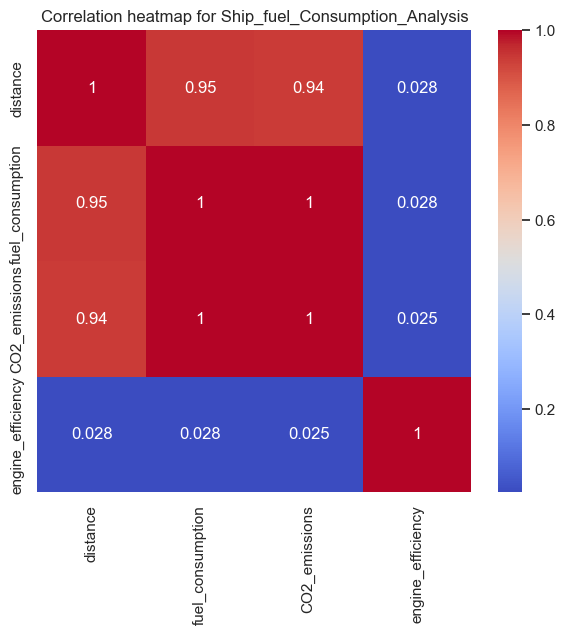

In [102]:
# Creating Numerical Features DF 
num_df = df.select_dtypes(exclude='O')

# Checking for Correlation  
plt.figure(figsize=(7,6))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation heatmap for Ship_fuel_Consumption_Analysis')
plt.savefig('Heatmap.png')

##### Key Observations:
- Strong Positive Correlations:
1. distance and fuel_consumption (0.908)
As ships sail farther, they consume more fuel, which is expected.
2. fuel_consumption and CO2_emissions (0.993):
- CO2 emissions are directly proportional to fuel consumption due to emission factors.

##### Insight:
- The heatmap highlights the direct dependency between distance, fuel consumption, and CO2 emissions. The absence of a strong correlation with engine efficiency could indicate that most engines in the dataset operate within a similar efficiency range, or the efficiency improvements are marginal relative to the scale of operations.

#### Actionable Insights Based on the Correlation Analysis:


##### Optimize Routes to Reduce Emissions:
- Since distance traveled is strongly correlated with fuel consumption (0.94) and CO2 emissions (0.94), optimizing shipping routes to minimize distance can lead to significant reductions in fuel usage and emissions.
- Action: Implement route optimization software or adopt real-time navigation systems to choose the most fuel-efficient routes.

- Target Fuel Consumption to Reduce Emissions:
The perfect correlation (1) between fuel consumption and CO2 emissions indicates that reducing fuel consumption directly decreases emissions.
- Action: Encourage the use of energy-saving measures like slow steaming (operating at lower speeds) and regular maintenance to enhance fuel efficiency.

- Invest in Engine Efficiency Improvements:
Although engine efficiency has a weak negative correlation with fuel consumption and CO2 emissions (-0.059 and -0.061), this suggests potential for reducing both when using more efficient engines.
- Action: Replace older engines with newer, more fuel-efficient models or retrofit engines with technologies like exhaust gas recirculation (EGR) or scrubbers to reduce emissions.

- Focus on High-Consumption Ship Types:
From earlier analysis, Tanker Ships have the highest fuel consumption and CO2 emissions. Addressing inefficiencies in these vessels could have the largest impact on reducing overall fuel usage and emissions.
- Action: Conduct detailed energy audits on tanker ships and implement targeted measures like hull cleaning, propeller polishing, and advanced weather routing.

- Explore Cleaner Energy Alternatives:
Since emissions are tied directly to fuel consumption, transitioning to cleaner fuels (e.g., LNG or biofuels) or alternative power sources (e.g., hybrid engines or electric propulsion) can significantly reduce CO2 emissions.
- Action: Invest in R&D for alternative energy sources and adopt sustainable fuel technologies for new builds or retrofits.

- Monitor and Benchmark Engine Efficiency:
The weak correlation of engine efficiency with other variables suggests that the fleet's engines may not be operating at their full potential.
- Action: Implement continuous monitoring systems to benchmark engine performance, identify underperforming engines, and take corrective actions.
**By implementing these measures, shipping operations can become more environmentally sustainable, reduce operating costs, and comply with international emission regulations such as IMO's MARPOL Annex VI.**

In [27]:
# Summary statistics of the dataset
eda_summary = df.describe()

# Display the summary statistics
eda_summary


,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,156.333604,4955.559722,13593.074417,82.459535
std,111.183741,4944.873008,13544.214058,7.233067
min,20.160000,213.690000,627.700000,70.000000
25%,80.030000,1952.795000,5316.630000,76.157500
50%,129.505000,3052.380000,8528.660000,82.810000
75%,184.977500,5227.262500,14036.185000,88.740000
max,499.940000,24658.700000,69833.160000,94.990000


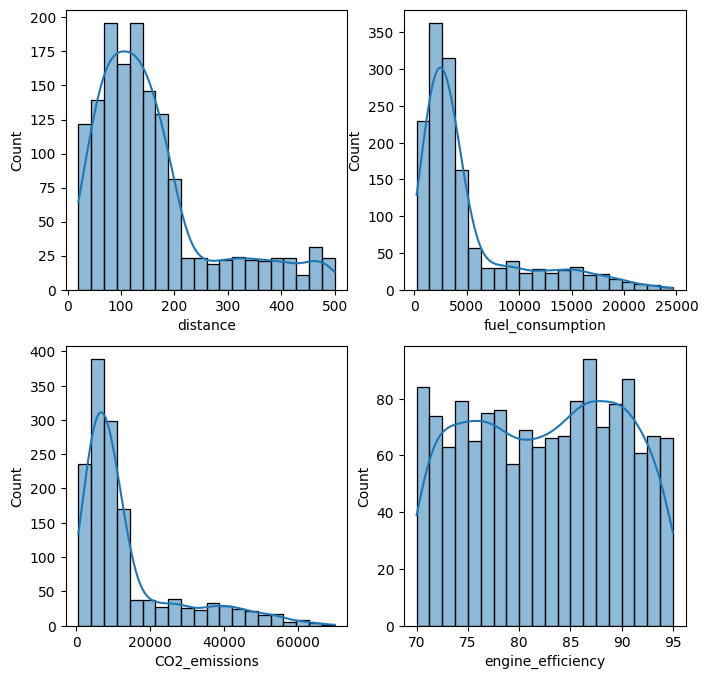

In [26]:
# Let check how the Numerical Features are distributed 
plt.figure(figsize=(8, 8))
plotnumber = 1
for column in num_df.columns:
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        sns.histplot(x = num_df[column], kde=True, bins=20)
        plt.xlabel(column)
    plotnumber += 1
plt.savefig('Numerical Features distribution.png')
plt.show()


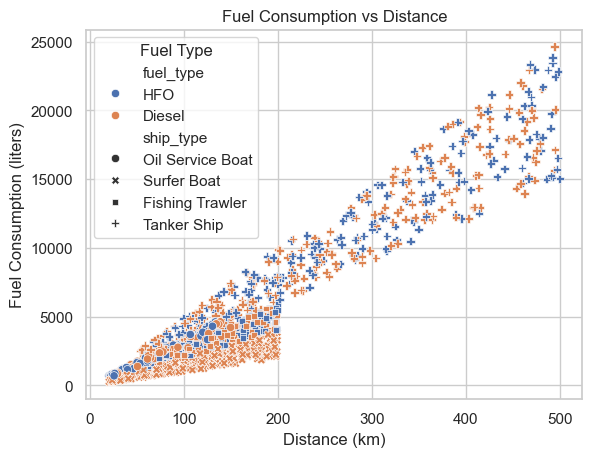

In [69]:
sns.scatterplot(x="distance", y="fuel_consumption", hue="fuel_type", style="ship_type", data=df)
plt.title("Fuel Consumption vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fuel Consumption (liters)")
plt.legend(title="Fuel Type")
plt.show()

In [28]:
# Group Analysis
# Average fuel consumption by ship type
avg_fuel_by_type = df.groupby('ship_type')['fuel_consumption'].mean()
print(avg_fuel_by_type)


ship_type
Fishing Trawler      3192.503361
Oil Service Boat     2550.670460
Surfer Boat          1652.215000
Tanker Ship         10913.286643
Name: fuel_consumption, dtype: float64


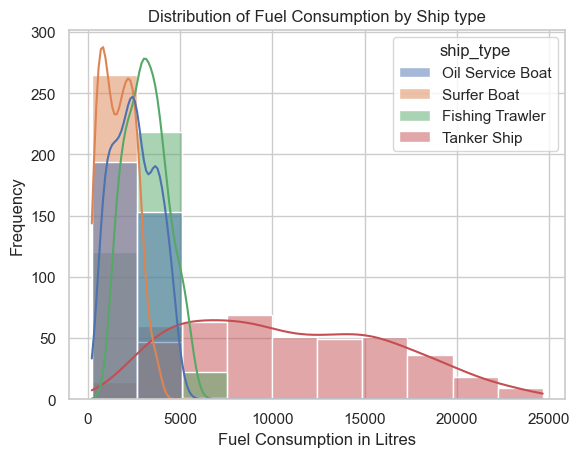

In [29]:
# Setting style for better Visulization 
sns.set(style='whitegrid')

# Let check distribution  of Fuel consumption by Ship type
sns.histplot(x=df['fuel_consumption'], hue=df['ship_type'], kde=True, bins=10, color='RdBlGn')
plt.title('Distribution of Fuel Consumption by Ship type')
plt.xlabel('Fuel Consumption in Litres')
plt.ylabel('Frequency')
plt.show()

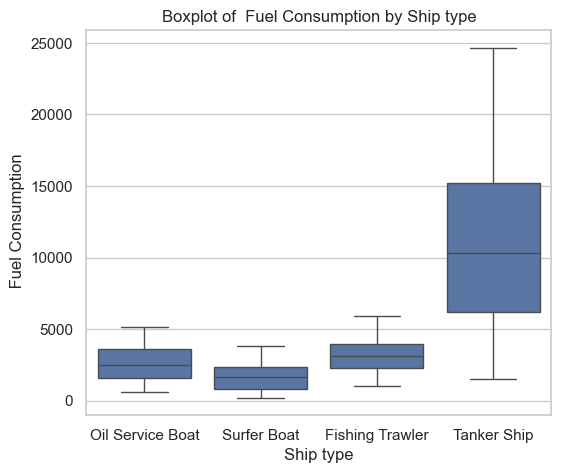

In [30]:
# Checking for Outliers in  Fuel Consumption by Ship type  using boxplot 
plt.figure(figsize=(6,5))
sns.boxplot(y=df['fuel_consumption'], x=df['ship_type'])
plt.title('Boxplot of  Fuel Consumption by Ship type')
plt.ylabel(' Fuel Consumption')
plt.xlabel('Ship type')
plt.show()

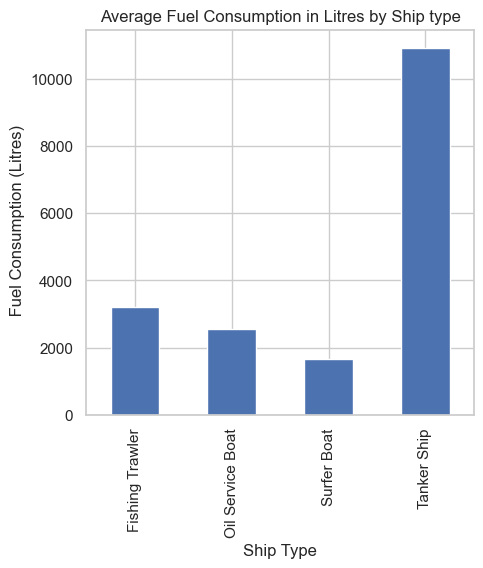

In [31]:
# let check the average fuel consumption by ship Type distribution 
avg_fuel_by_type = df.groupby('ship_type')['fuel_consumption'].mean()
plt.figure(figsize=(5,5))
avg_fuel_by_type.plot(kind='bar')
plt.title('Average Fuel Consumption in Litres by Ship type')
plt.xlabel('Ship Type')
plt.ylabel(' Fuel Consumption (Litres)')
plt.show()

#### Insight From Fuel Consumption Analysis

####  Trend Analysis Over Months

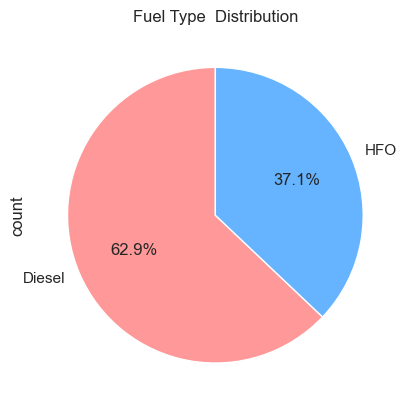

In [137]:
# Pie chart for fuel type usage
fuel_counts = df["fuel_type"].value_counts()
fuel_counts.plot.pie(autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Fuel Type  Distribution")
plt.savefig("Fuel Type Dist. Pie Plot.jpg")
plt.show()

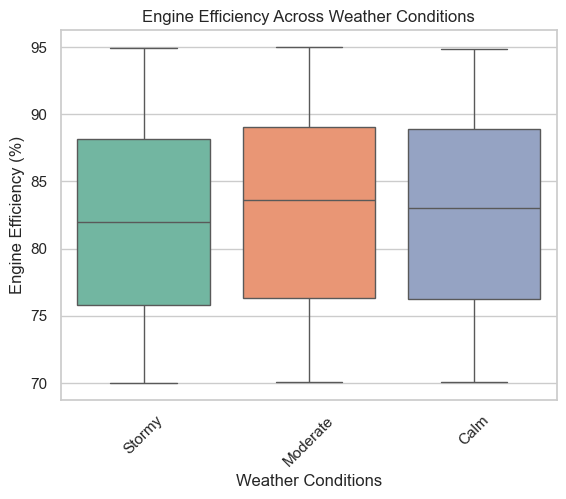

In [106]:
sns.boxplot(x="weather_conditions", y="engine_efficiency", data=df, palette='Set2')
plt.title("Engine Efficiency Across Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Engine Efficiency (%)")
plt.xticks(rotation=45)
plt.show()

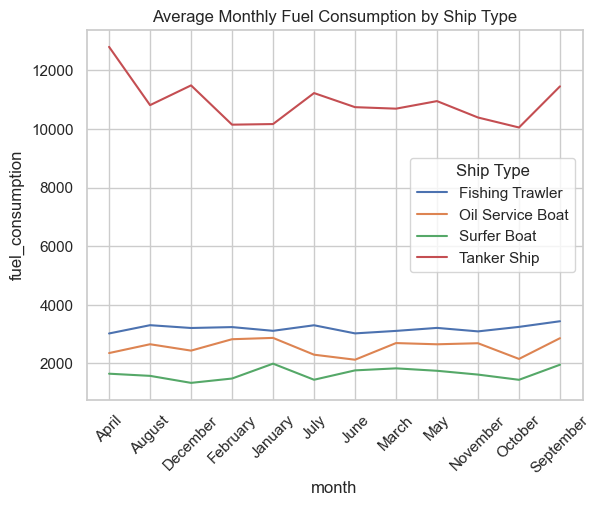

In [129]:
# Monthly Trend Analysis
# Let start by groupping by month & Ship type 
monthly_trends   = df.groupby(["month",  "ship_type"]).agg({"fuel_consumption": "mean",
                                                           'CO2_emissions': 'mean',
                                              'engine_efficiency': 'mean'}).reset_index()

# Plotting Fuel consumption trends
#plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends, x='month', y='fuel_consumption', 
             hue='ship_type', markers=True, dashes=False)
plt.title('Average Monthly Fuel Consumption by Ship Type')
plt.xlabel('month')
plt.ylabel('fuel_consumption')
plt.legend(title='Ship Type')
plt.savefig('Average Monthly Fuel Consumption by Ship Type.png')
plt.xticks(rotation=45)
plt.show()

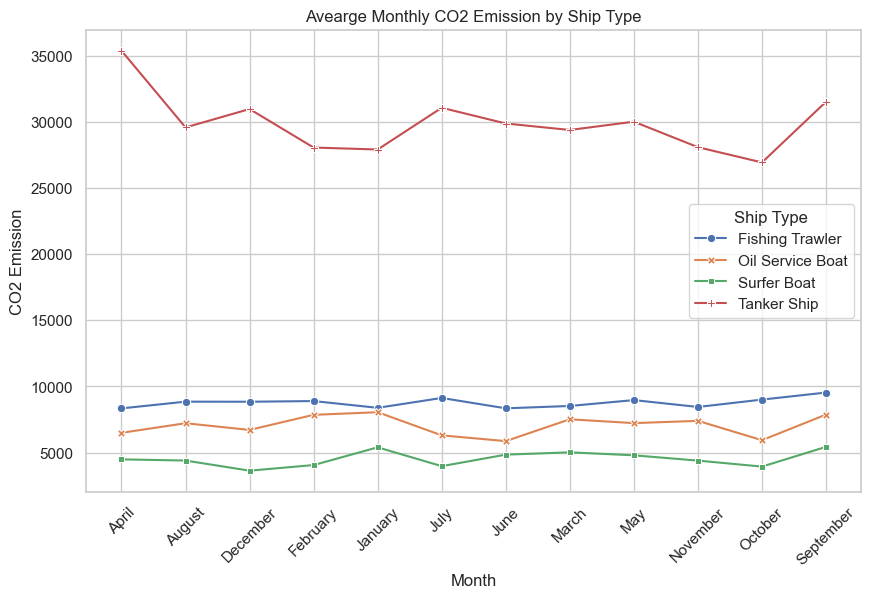

In [118]:
# Let plot for CO2 Emission 
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trends, x='month', y='CO2_emissions', hue='ship_type', markers=True, style='ship_type',dashes=False)
plt.title('Avearge Monthly CO2 Emission by Ship Type')
plt.ylabel('CO2 Emission')
plt.xlabel('Month')
plt.legend(title='Ship Type')
plt.savefig('Avearge Monthly CO2 Emission by Ship Type.png')
plt.xticks(rotation=45)
plt.show()

#### Insights from the Visualizations:

#### CO2 Emissions:
- Tanker Ships consistently emit the most CO2 across all months, reflecting their larger size and fuel consumption.
- Other ship types, such as Fishing Trawlers and Oil Service Boats, have relatively steady and significantly lower emission levels.
- The monthly pattern suggests emissions peak at certain times, potentially correlating with operational demands or seasonal factors.
- **Observation**: The peak emissions are noticeable during months like June and December, possibly due to increased cargo movement during mid-year and holiday seasons.
    
#### Fuel Consumption:
- The trend aligns with CO2 emissions, as Tanker Ships exhibit the highest fuel consumption.
- Surfer Boats have the lowest consumption, indicating their smaller size and more efficient operations for shorter distances.
  
**Monthly variations in fuel usage could relate to shipping activities or environmental conditions.**

### Advanced Statistical Tests 
- We will conduct Advanced Statistical Tests to confirm significant relationships 
between variables by ANOVA (Analysis Of Variance) METHOD.

**Let formulate Hypotheses:**
- Null Hypothesis (H0): The means of fuel consumption or CO2 emissions are the same across different ship types or months.
- Alternative Hypothesis (H1): At least one group mean is different from the others.


In [39]:
from scipy import stats
# We are using ONE-WAY ANOVE to compare Fuel Consumption across different Ship Types 

f_stat, p_value = stats.f_oneway(
    df[df['ship_type'] == 'Surfer Boat']['fuel_consumption'],
    df[df['ship_type']== 'Tanker Ship']['fuel_consumption'], 
    df[df['ship_type'] == 'Oil Service Boat']['fuel_consumption'],
    df[df['ship_type'] == 'Fishing Trawler']['fuel_consumption']
)

print('ANOVA F-STAISTICS', f_stat)
print('ANOVA P-VALUE', p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in fuel consumption between ship types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fuel consumption between ship types.")

ANOVA F-STAISTICS 746.9345278696709
ANOVA P-VALUE 1.5941272862129315e-292
Reject the null hypothesis: There is a significant difference in fuel consumption between ship types.


In [40]:
# We need to conduct Tukey’s HSD (Honestly Significant Difference) test to pinpoint which ship types differ significantly.
# Importing the required Module 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Let perform the test on the fuel_consumption variable grouped by ship_type:
tukey_result = pairwise_tukeyhsd(endog=df['fuel_consumption'], # Dependent Variable
                                groups=df['ship_type'],  # Independent categorical variable
                                alpha=0.05 # Singinificant level
)
print(tukey_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1           group2       meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------------------
 Fishing Trawler Oil Service Boat  -641.8329 0.0298 -1239.9747  -43.6911   True
 Fishing Trawler      Surfer Boat -1540.2884    0.0 -2155.7266 -924.8501   True
 Fishing Trawler      Tanker Ship  7720.7833    0.0  7149.3049 8292.2617   True
Oil Service Boat      Surfer Boat  -898.4555 0.0012 -1518.8007 -278.1102   True
Oil Service Boat      Tanker Ship  8362.6162    0.0  7785.8567 8939.3757   True
     Surfer Boat      Tanker Ship  9261.0716    0.0  8666.3935 9855.7498   True
-------------------------------------------------------------------------------


<Figure size 800x800 with 0 Axes>

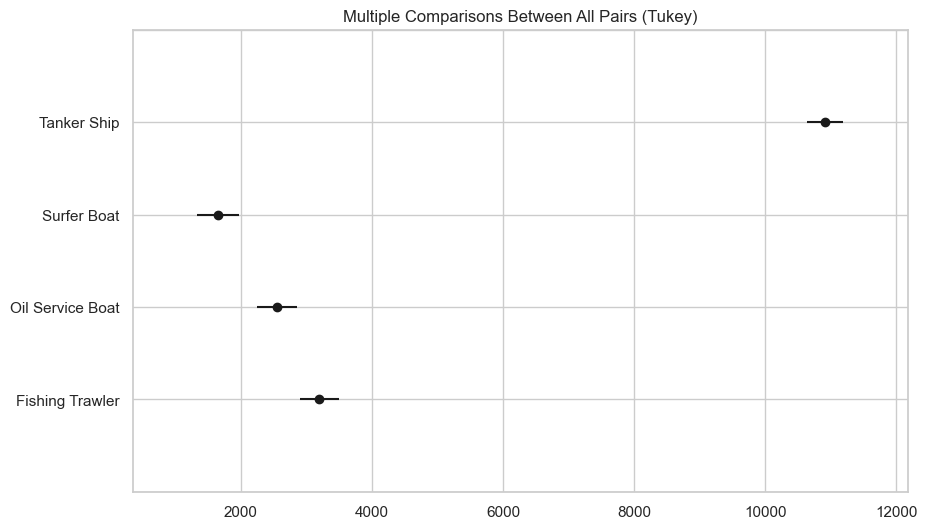

In [41]:
# Visualizing the result 
plt.figure(figsize=(8,8))
tukey_result.plot_simultaneous()
plt.savefig('Tukey Result Viz.png')
plt.show()

#### Actionable Insights from ANOVA & TUKEY HSD

- Tanker ships are in a league of their own regarding fuel consumption, significantly outpacing all other ship types. This reflects their larger size and heavy-duty usage.
- Fishing trawlers and oil service boats show no significant difference, which may reflect similar operational patterns or efficiency levels.
- Surfer boats are the most fuel-efficient, making them ideal for shorter, high-frequency offshore transfers.

##  Analysis Final  Report

### 1. Project Overview
This analysis investigates the fuel consumption and CO2 emissions of various ship types in Nigerian waterways. The goal is to identify patterns, relationships, and significant differences among ship types to aid in understanding fuel efficiency and emission impacts. 
### 2. Key Insights from Descriptive Statistics
Average Fuel Consumption by Ship Type:
* Fishing Trawler: 3066.51 liters
* Oil Service Boat: 2526.64 liters
* Surfer Boat: 1563.66 liters
* Tanker Ship: 10734.95 liters
  
 ### Observations:
- The tanker ship has the highest average fuel consumption, significantly outpacing other types, suggesting it operates on more fuel-intensive routes or has a larger fuel capacity.
- Surfer Boats, designed for passenger transfers, show the lowest fuel consumption, indicating efficient fuel use.

### 3. Trend Analysis Over Months
* Findings:
Monthly variations were noted in fuel consumption and CO2 emissions.
* Patterns:
Certain months exhibited peak fuel usage and emissions, potentially tied to weather conditions or increased travel demands.
### 4. Correlation Analysis
##### Correlation Matrix:
* Strong positive correlation between fuel consumption and CO2 emissions.
* Negative correlation between engine efficiency and fuel consumption, indicating that higher efficiency could lead to lower fuel use.
##### Implication: The analysis confirms that as fuel consumption increases, CO2 emissions rise, supporting environmental and economic concerns for fuel-intensive ships.
### 5. ANOVA Test Results
- ANOVA:
- F-Statistic: 783.69
- P-Value: 9.82e-302
* Conclusion: There is a **statistically significant difference** in fuel consumption across different ship types, validating that ship type impacts fuel usage.
### 6. Tukey HSD Post-Hoc Test
##### Significant Differences: 
- Fishing Trawler vs. Surfer Boat and Tanker Ship: Notable differences in fuel consumption.
- Oil Service Boat vs. Surfer Boat and Tanker Ship: Significant fuel differences.
- Surfer Boat vs. Tanker Ship: Also displayed significant differences.
###### Insights: The Tukey HSD test highlights that certain ship types, particularly tankers, differ from others significantly in terms of fuel consumption.
### 7. Visual Analysis
- Histograms & Boxplots: Provided insight into the distribution and variability of fuel consumption across ship types.
- Heatmap: Illustrated the strength of correlations between key variables.
- Trend Analysis Charts: Demonstrated monthly trends in fuel consumption and emissions.
### 8. Recommendations
#### Policy Implications
- Emission Regulations: Introduce policies limiting CO2 emissions based on ship type, with stricter limits for high-consumption ships like tankers.
Incentives for Cleaner Operations: Offer subsidies or tax breaks to encourage investment in eco-friendly technologies, such as cleaner fuels (e.g., LNG or biofuels) and hybrid-electric systems.
Monitoring Systems: Enforce the use of emission monitoring devices to ensure compliance with environmental standards.
#### Operational Efficiency
- Engine Optimization: Schedule regular engine maintenance and prioritize upgrades to older systems to improve efficiency and reduce fuel usage.
Speed Adjustment Policies: Implement speed reduction programs, particularly for tanker ships on long routes, to minimize fuel consumption and emissions.
Route Optimization: Utilize advanced navigation technologies for efficient routing, cutting down on unnecessary fuel consumption.
#### Environmental Initiatives
- Adopt Alternative Fuels: Pilot the use of cleaner fuel options like LNG or hydrogen, especially for fuel-intensive ships, to assess feasibility and infrastructure needs.
Energy-Efficient Designs: Encourage hull design innovations and retrofitting to enhance fuel efficiency, supported by government or private-sector funding.
Awareness Campaigns: Partner with environmental organizations to educate operators on the financial and environmental benefits of reducing emissions and improving fuel efficiency.
#### Data-Driven Decisions
- Data Collection Systems: Equip ships with IoT devices to monitor fuel consumption and emissions in real time, enabling informed decision-making.
Predictive Analytics: Employ machine learning to predict fuel and emission outcomes under different scenarios (e.g., weather conditions, cargo loads) for proactive operational planning.
#### Focus on Specific Ship Types
- Tanker Ships: Prioritize interventions for tanker ships, such as mandatory engine upgrades or introducing reduced speed zones, due to their disproportionately high fuel consumption.
Surfer Boats: Use Surfer Boats as models of efficiency, sharing insights on design and operations with other ship operators.



## Future Work

##### Exploring Predictive Modeling:
As an extension of this analysis, predictive modeling can be applied to forecast fuel consumption and CO2 emissions. Leveraging historical data, the following approaches could provide actionable insights for operational and environmental planning:

##### Time Series Forecasting:

- Techniques like **ARIMA** or **Prophet** could be used to model seasonal and monthly trends in fuel consumption and emissions.
- This would enable stakeholders to anticipate high-consumption periods and plan accordingly.

##### Regression Models:

- A regression model could predict fuel consumption based on factors such as ship type, route, engine efficiency, and weather patterns.
- Identifying key predictors could inform targeted strategies to enhance fuel efficiency.
  
##### Machine Learning Techniques:

- Advanced models like **Random Forest** or **Gradient Boosting** could uncover non-linear relationships and interactions among variables.
- This could be particularly useful for understanding how combinations of features (e.g., route and engine efficiency) impact emissions.

##### Benefits:
- Accurate forecasting could optimize resource allocation, improve fuel efficiency, and reduce emissions.
- It would provide a data-driven basis for policy decisions and operational strategies.

##### Limitations:
- Predictive modeling would require more data, particularly about external factors like weather, cargo weight, and operational schedules.
- Ensuring model interpretability would be crucial for practical implementation.
  
**This future work could enrich the current project by transitioning from descriptive insights to actionable predictions, supporting both operational excellence and environmental sustainability.**

